# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of Ridge and Lasso regression!

## Objectives

You will be able to:
* Use Lasso and ridge regression in Python
* Compare Lasso and Ridge with standard regression
* Find optimal values of alpha for Lasso and Ridge

## Housing Prices Data

Let's look at yet another house pricing data set.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing_Prices/train.csv')

Look at df.info

In [ ]:
# Your code here

First, make a selection of the data by removing some of the data with `dtype = object`, this way our first model only contains **continuous features**

Make sure to remove the SalesPrice column from the predictors (which you store in `X`).

Store the target in `y`.

In [ ]:
# Create X and y then split in train and test


# remove "object"-type features and SalesPrice from `X`



## Let's use this data to perform a first naive linear regression model

Compute the R squared and the MSE for both train and test set.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer

# Impute missing values with median using Imputer from sklearn.preprocessing


# Fit the model and print R2 and MSE for train and test



## Normalize your data

We haven't normalized our data, let's create a new model that uses `StandardScalar` to scale our predictors!

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the train and test data



Perform the same linear regression on this data and print out R-squared and MSE.

In [ ]:
# Your code here

## Include categorical variables

Your model hasn't included categorical variables so far: let's use the "object" variables again

In [ ]:
# Create X_cat which contains only the categorical variables


#Fill missing values with a string indicating that that it is missing



In [ ]:
from sklearn.preprocessing import OneHotEncoder
# OneHotEncode Categorical variables


Merge `x_cat` together with our scaled `X` so you have one big predictor dataframe.

In [ ]:
# Your code here

Perform the same linear regression on this data and print out R-squared and MSE.

In [ ]:
# Your code here

Notice the severe overfitting above; our training R squared is quite high, but the testing R squared is negative! Our predictions are far off. Similarly, the scale of the Testing MSE is orders of magnitude higher than that of the training.

## Perform Ridge and Lasso regression

Use all the data (normalized features and dummy categorical variables) and perform Lasso and Ridge regression for both! Each time, look at R-squared and MSE.

## Lasso

With default parameter (alpha = 1)

In [ ]:
# Your code here

With a higher regularization parameter (alpha = 10)

In [ ]:
# Your code here

## Ridge

With default parameter (alpha = 1)

In [ ]:
# Your code here

With default parameter (alpha = 10)

In [ ]:
# Your code here

## Look at the metrics, what are your main conclusions?   

Conclusions here

## Compare number of parameter estimates that are (very close to) 0 for Ridge and Lasso

Compare with the total length of the parameter space and draw conclusions!

In [ ]:
# number of Ridge params almost zero

In [ ]:
# number of Lasso params almost zero

Lasso was very effective to essentially perform variable selection and remove about 25% of the variables from your model!

In [ ]:
# your code here

## Summary

To bring all of our work together lets take a moment to put all of our preprocessing steps for categorical and continuous variables into one function. This function should take in our features as a dataframe `X` and target as a Series `y` and return a training and test dataframe with all of our preprocessed features along with training and test targets. 

In [ ]:
def preprocess(X, y):
    '''Takes in features and target and implements all preprocessing steps for categorical and continuous features returning 
    train and test dataframes with targets'''
    
    #train test split

    
    # remove "object"-type features and SalesPrice from `X`


    # Impute missing values with median using Imputer from sklearn.preprocessing


    # Scale the train and test data


    # Create X_cat which contains only the categorical variables


    #Fill nans with a value indicating that that it is missing


    # OneHotEncode Categorical variables

    
    # combine categorical and continuous features into the final dataframe
    
    return X_train_all, X_test_all, y_train, y_test

### Graph the Training and Test Error to Find Optimal Alpha Values

Earlier we tested several values of alpha to see how it effected our MSE and the value of our coefficients. We could continue to guess values of alpha for our Ridge or Lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would 

In [23]:
X_train_all, X_test_all, y_train, y_test = preprocess(X, y)

train_mse = []
test_mse = []
alphas = []

for alpha in np.linspace(0, 200, num=50):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_all, y_train)
    
    train_preds = lasso.predict(X_train_all)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_all)
    test_mse.append(mean_squared_error(y_test, test_preds))
    
    alphas.append(alpha)

Optimal Alpha Value: 40


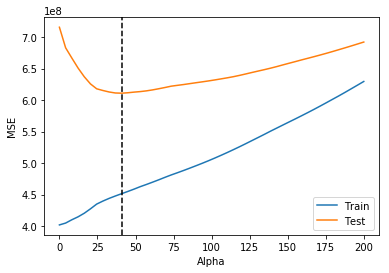

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

#np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# add a vertical line where the testing MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Take a look at this graph of our training and testing MSE against alpha. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what alpha represents and how it relates to overfitting vs underfitting.

## Level Up
If you would like more practice doing this kind of analysis try to find the optimal value of alpha for a Ridge regression.